In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Finding sticker using color mask and morphological operation

In [2]:
# img = cv2.imread(r'..\img_test\frame_game_fixed.png')
# img = cv2.imread(r'..\img_test\frame_fix_clean.jpg')
img = cv2.imread(r'..\img_test\frame_game_moving.png')

# Convert the image to RGB (OpenCV uses BGR by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
def show_image(image, title="Image", cmap=None):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.imshow(image, cmap=cmap)
    plt.show()

def color_mask(image, lower_rgb, upper_rgb):
    lower_bound = np.array(lower_rgb, dtype=np.uint8)
    upper_bound = np.array(upper_rgb, dtype=np.uint8)
    mask = cv2.inRange(image, lower_bound, upper_bound)
    return mask

def dilate(img, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    img_dilate = cv2.dilate(img, kernel, iterations=1)
    return img_dilate

def erode(img, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    img_erode = cv2.erode(img, kernel, iterations=1)
    return img_erode

def opening(img, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    img_opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    return img_opening

def closing(img, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    img_closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    return img_closing

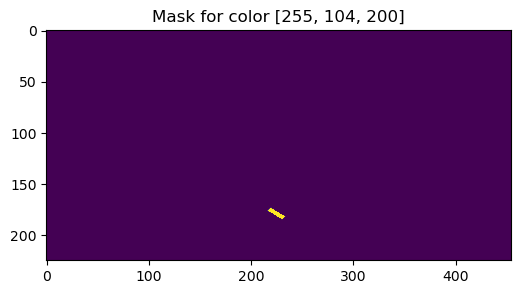

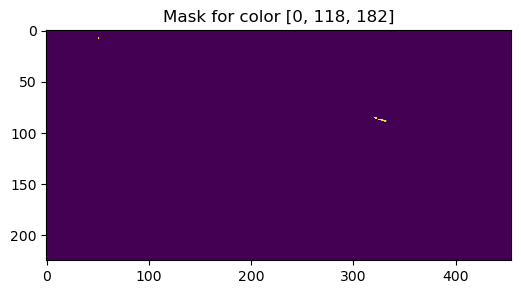

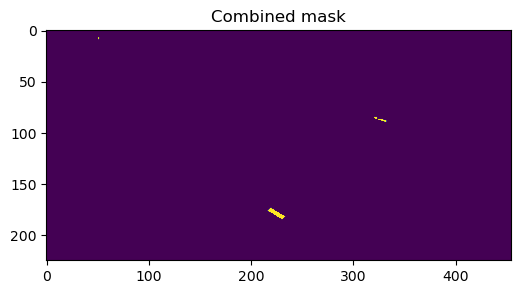

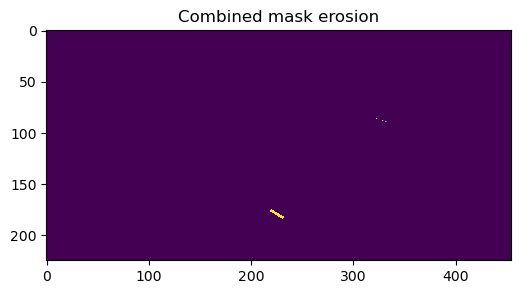

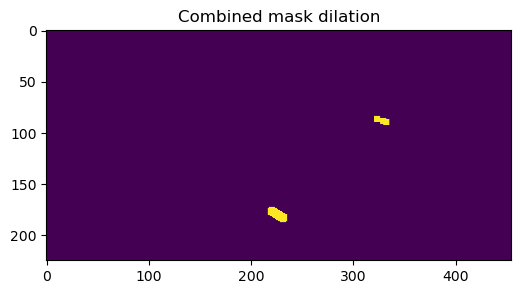

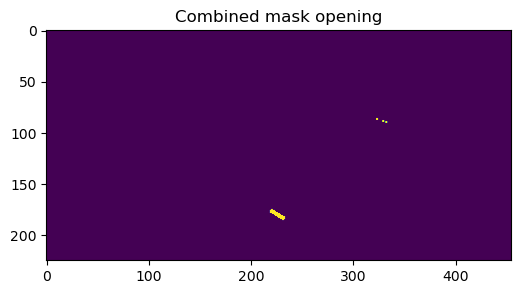

In [4]:
# Define RGB color ranges for the two chessboard colors
white = [235, 236, 228]  
black = [95, 64, 59]

pink = [255, 59, 155]  
blue = [44, 163, 227]   

white = pink
black = blue

range_white = 45         
range_black = 45         
lower_white = [max(0, c - range_white) for c in white]
upper_white = [min(255, c + range_white) for c in white] 
lower_black = [max(0, c - range_black) for c in black] 
upper_black = [min(255, c + range_black) for c in black] 

# Create masks for both the white and black squares of the chessboard
mask_white = color_mask(img_rgb, lower_white, upper_white)
show_image(mask_white, title=f"Mask for color {upper_white}")

mask_black = color_mask(img_rgb, lower_black, upper_black)
show_image(mask_black, title=f"Mask for color {lower_black}")

# Combine the masks to isolate the chessboard
combined_mask = cv2.bitwise_or(mask_white, mask_black)
show_image(combined_mask, title="Combined mask")

combined_mask_morph = combined_mask.copy()

# get rid of outliers
combined_mask_erosion = erode(combined_mask_morph, 2)
show_image(combined_mask_erosion, title="Combined mask erosion")

# amplify sticker remaining
combined_mask_dilation = dilate(combined_mask_erosion, 6)
show_image(combined_mask_dilation, title="Combined mask dilation")

# opening = erosion followed by dilation but since the kernel is the same for both, less adaptive
combined_mask_opening = opening(combined_mask_morph, 2)
show_image(combined_mask_opening, title="Combined mask opening")